In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale



In [2]:
field_results_data = pd.read_csv('../Capstone Project/capstone_joined_df.csv', low_memory=False)

In [3]:
field_results_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236619 entries, 0 to 236618
Data columns (total 85 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   station_id_Dissolved_Oxygen            149011 non-null  float64
 1   station_name_Dissolved_Oxygen          149011 non-null  object 
 2   station_number_Dissolved_Oxygen        149011 non-null  object 
 3   full_station_name_Dissolved_Oxygen     149011 non-null  object 
 4   station_type_Dissolved_Oxygen          149011 non-null  object 
 5   latitude_Dissolved_Oxygen              148057 non-null  float64
 6   longitude_Dissolved_Oxygen             148057 non-null  float64
 7   status_Dissolved_Oxygen                149011 non-null  object 
 8   county_name_Dissolved_Oxygen           149011 non-null  object 
 9   sample_code                            236619 non-null  object 
 10  sample_date_Dissolved_Oxygen           149011 non-null  

In [4]:
field_results_data=field_results_data.drop(['fdr_reporting_limit_pH','fdr_reporting_limit_Dissolved_Oxygen','station_name_Dissolved_Oxygen', 'full_station_name_Dissolved_Oxygen','station_type_Dissolved_Oxygen','status_Dissolved_Oxygen','station_number_Dissolved_Oxygen','sample_date_Dissolved_Oxygen','sample_depth_units_Dissolved_Oxygen','anl_data_type_Dissolved_Oxygen','parameter_Dissolved_Oxygen','fdr_text_result_Dissolved_Oxygen','fdr_date_result_Dissolved_Oxygen','sample_depth_units_Water_Temperature','anl_data_type_Water_Temperature','parameter_Water_Temperature','uns_name_Dissolved_Oxygen','mth_name_Dissolved_Oxygen','county_name_Water_Temperature','sample_date_Water_Temperature','sample_depth_Water_Temperature','fdr_footnote_Dissolved_Oxygen','latitude_Water_Temperature','longitude_Water_Temperature','status_Water_Temperature','fdr_text_result_Water_Temperature','fdr_date_result_Water_Temperature','fdr_reporting_limit_Water_Temperature','uns_name_Water_Temperature','station_name_pH','mth_name','fdr_footnote','station_id_Water_Temperature','station_name_Water_Temperature','station_number_Water_Temperature','full_station_name_Water_Temperature','station_type_Water_Temperature','station_number_pH','anl_data_type','parameter','fdr_text_result','fdr_date_result','fdr_reporting_limit','uns_name','mth_name_Water_Temperature','fdr_footnote_Water_Temperature','full_station_name_pH','full_station_name','station_type','latitude','longitude','status','county_name','sample_date','sample_depth','sample_depth_units','station_id_pH','station_type_pH','fdr_text_result_pH','fdr_date_result_pH','latitude_pH','longitude_pH','parameter_pH','uns_name_pH','mth_name_pH','fdr_footnote_pH','station_id','station_name','station_number','status_pH','county_name_pH','sample_date_pH','sample_depth_pH','sample_depth_units_pH','anl_data_type_pH'], axis=1)


In [5]:
#field_results_data=field_results_data.drop(['station_number_Dissolved_Oxygen'], axis=1)
field_results_data.head()

,station_id_Dissolved_Oxygen,latitude_Dissolved_Oxygen,longitude_Dissolved_Oxygen,county_name_Dissolved_Oxygen,sample_code,sample_depth_Dissolved_Oxygen,Dissolved_Oxygen,pH,Electrical_Conductance,Water_Temperature
0,12.0,37.8019,-121.6203,Alameda,OM0168A0001,1.0,9.2,7.3,NaN,6.7
1,12.0,37.8019,-121.6203,Alameda,OM0268A0006,1.0,9.7,7.5,NaN,6.7
2,12.0,37.8019,-121.6203,Alameda,OM0268A0013,1.0,7.6,7.6,NaN,11.1
3,12.0,37.8019,-121.6203,Alameda,OM0368A0021,1.0,7.0,7.5,NaN,15.6
4,12.0,37.8019,-121.6203,Alameda,OM0468A0032,1.0,8.2,7.7,NaN,15.6


In [6]:
field_results_data.info()

field_results_data.rename(columns={'station_id_Dissolved_Oxygen': 'station_id', 'latitude_Dissolved_Oxygen': 'latitude_Dissolved','longitude_Dissolved_Oxygen':'longitude_Dissolved','county_name_Dissolved_Oxygen':'county_name','sample_depth_Dissolved_Oxygen':'sample_depth','fdr_reporting_limit_Dissolved_Oxygen':'fdr_reporting_limit','fdr_reporting_limit_pH':'fdr_reporting'}, inplace=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236619 entries, 0 to 236618
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   station_id_Dissolved_Oxygen    149011 non-null  float64
 1   latitude_Dissolved_Oxygen      148057 non-null  float64
 2   longitude_Dissolved_Oxygen     148057 non-null  float64
 3   county_name_Dissolved_Oxygen   149011 non-null  object 
 4   sample_code                    236619 non-null  object 
 5   sample_depth_Dissolved_Oxygen  86402 non-null   float64
 6   Dissolved_Oxygen               149011 non-null  float64
 7   pH                             162141 non-null  float64
 8   Electrical_Conductance         1788 non-null    float64
 9   Water_Temperature              229974 non-null  float64
dtypes: float64(8), object(2)
memory usage: 18.1+ MB


In [7]:
field_results_data=field_results_data.dropna()

In [8]:
missing =  pd.concat([field_results_data.isnull().sum(), 100 * field_results_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
station_id,0,0.0
latitude_Dissolved,0,0.0
longitude_Dissolved,0,0.0
county_name,0,0.0
sample_code,0,0.0
sample_depth,0,0.0
Dissolved_Oxygen,0,0.0
pH,0,0.0
Electrical_Conductance,0,0.0
Water_Temperature,0,0.0


In [9]:
field_results_data['sample_code'] = field_results_data['sample_code'].str.extract('(\d+)').astype(float)

In [10]:
county_summary_scale=field_results_data.set_index('county_name')

county_summary_index=county_summary_scale.index

county_summary_columns=county_summary_scale.columns

county_summary_scale.head()

,station_id,latitude_Dissolved,longitude_Dissolved,sample_code,sample_depth,Dissolved_Oxygen,pH,Electrical_Conductance,Water_Temperature
county_name,,,,,,,,,
Alameda,12.0,37.8019,-121.6203,568.0,1.0,7.5,7.6,278.0,21.1
Alameda,12.0,37.8019,-121.6203,668.0,1.0,7.4,7.0,325.0,24.4
Alameda,12.0,37.8019,-121.6203,768.0,1.0,6.7,7.5,438.0,23.3
Alameda,12.0,37.8019,-121.6203,868.0,1.0,7.5,7.7,470.0,20.6
Alameda,12.0,37.8019,-121.6203,968.0,1.0,7.0,7.7,415.0,21.1


In [11]:
county_summary_scale=scale(county_summary_scale)

In [12]:
county_summary_scaled_df = pd.DataFrame(county_summary_scale, columns=county_summary_columns)
county_summary_scaled_df.head()

,station_id,latitude_Dissolved,longitude_Dissolved,sample_code,sample_depth,Dissolved_Oxygen,pH,Electrical_Conductance,Water_Temperature
0,-0.439566,0.075514,-0.781952,-0.613986,-0.212497,-0.782589,-0.654002,0.153631,0.850821
1,-0.439566,0.075514,-0.781952,-0.279239,-0.212497,-0.831290,-1.592367,0.478431,1.488029
2,-0.439566,0.075514,-0.781952,0.055508,-0.212497,-1.172193,-0.810396,1.259332,1.275626
3,-0.439566,0.075514,-0.781952,0.390255,-0.212497,-0.782589,-0.497608,1.480472,0.754274
4,-0.439566,0.075514,-0.781952,0.725002,-0.212497,-1.026091,-0.497608,1.100388,0.850821


In [13]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
county_summary_scale_imputed = imputer.fit_transform(county_summary_scale)

# Apply PCA
county_pca = PCA().fit(county_summary_scale_imputed)


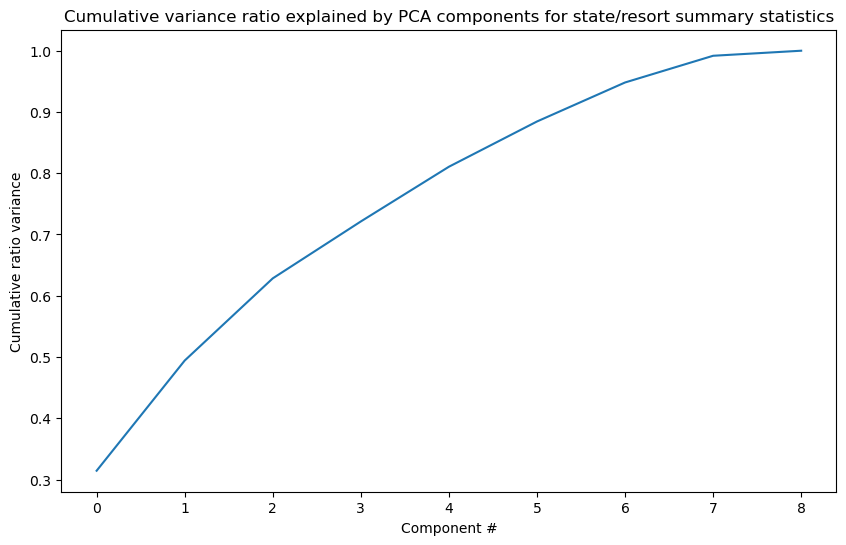

In [14]:
plt.subplots(figsize=(10, 6))
plt.plot(county_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for state/resort summary statistics');

In [15]:
county_pca_x = county_pca.transform(county_summary_scale)
county_pca_x.shape

(1584, 9)

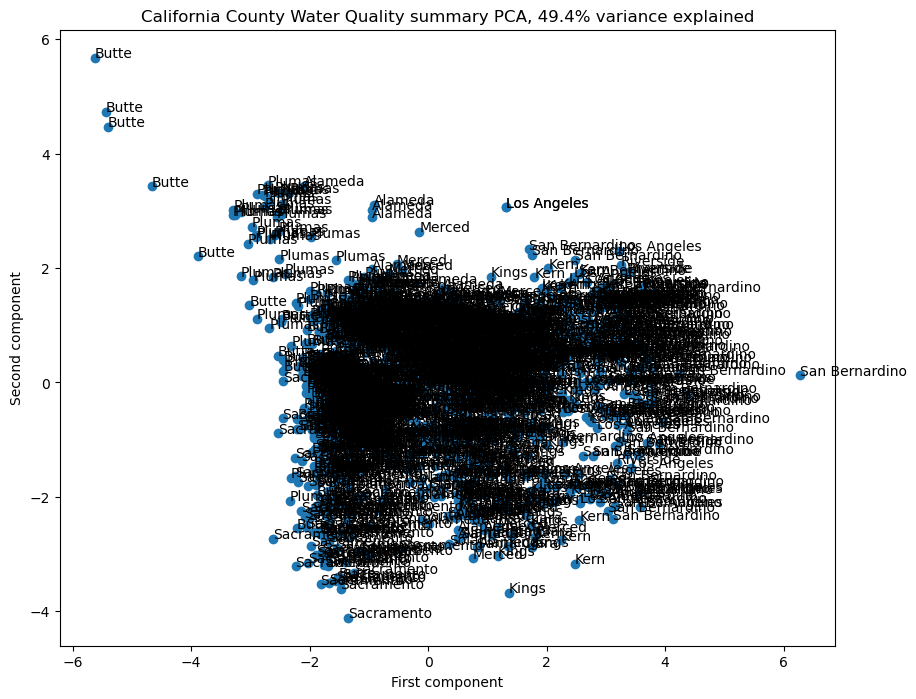

In [16]:
x = county_pca_x[:, 0]
y = county_pca_x[:, 1]
county=field_results_data["county_name"]
county = county_summary_index
pc_var = 100 * county_pca.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(10,8))
plt.scatter(x=x, y=y)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f'California County Water Quality summary PCA, {pc_var:.1f}% variance explained')
for s, x, y in zip(county, x, y):
    plt.annotate(s, (x, y))

In [17]:
county_avg_dissolved_oxygen = field_results_data.groupby('county_name')['Dissolved_Oxygen'].mean()
county_avg_dissolved_oxygen.head()

county_name
Alameda          8.909195
Butte            9.820219
Contra Costa     8.250000
Fresno           8.709091
Kern            10.027368
Name: Dissolved_Oxygen, dtype: float64

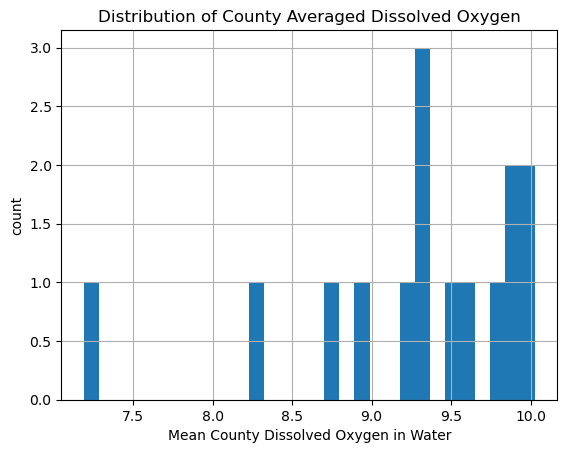

In [18]:
county_avg_dissolved_oxygen.hist(bins=30)
plt.title('Distribution of County Averaged Dissolved Oxygen')
plt.xlabel('Mean County Dissolved Oxygen in Water')
plt.ylabel('count');

In [19]:
county_avg_ph = field_results_data.groupby('county_name')['pH'].mean()
county_avg_ph.head()

county_name
Alameda         8.063218
Butte           7.396776
Contra Costa    7.996154
Fresno          8.727273
Kern            8.527368
Name: pH, dtype: float64

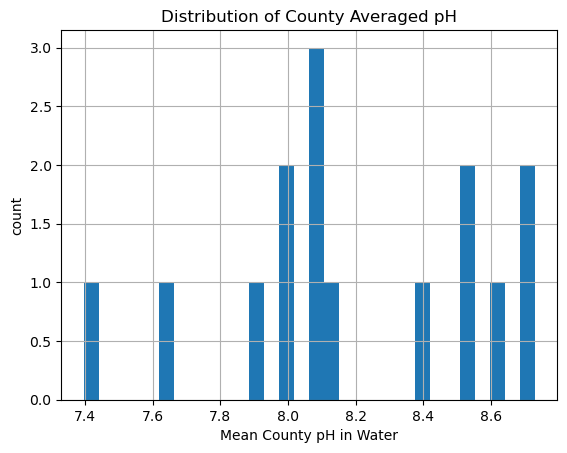

In [20]:
county_avg_ph.hist(bins=30)
plt.title('Distribution of County Averaged pH')
plt.xlabel('Mean County pH in Water')
plt.ylabel('count');

In [21]:
county_avg_Electrical_Conductance = field_results_data.groupby('county_name')['Electrical_Conductance'].mean()
county_avg_Electrical_Conductance.head()

county_name
Alameda         337.396552
Butte            83.438798
Contra Costa    337.000000
Fresno          387.363636
Kern            364.031579
Name: Electrical_Conductance, dtype: float64

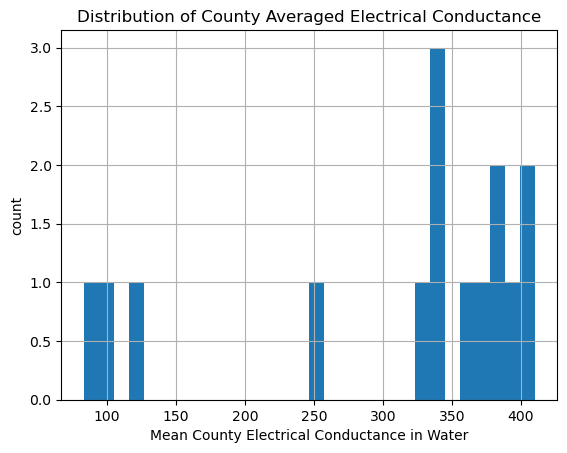

In [22]:
county_avg_Electrical_Conductance.hist(bins=30)
plt.title('Distribution of County Averaged Electrical Conductance')
plt.xlabel('Mean County Electrical Conductance in Water')
plt.ylabel('count');

In [23]:
county_avg_Water_Temperature = field_results_data.groupby('county_name')['Water_Temperature'].mean()
county_avg_Water_Temperature.head()

county_name
Alameda         17.054598
Butte           15.305464
Contra Costa    17.673077
Fresno          23.427273
Kern            18.327368
Name: Water_Temperature, dtype: float64

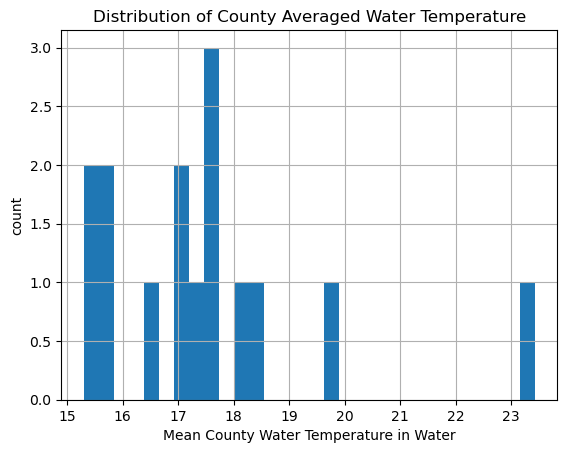

In [24]:
county_avg_Water_Temperature.hist(bins=30)
plt.title('Distribution of County Averaged Water Temperature')
plt.xlabel('Mean County Water Temperature in Water')
plt.ylabel('count');

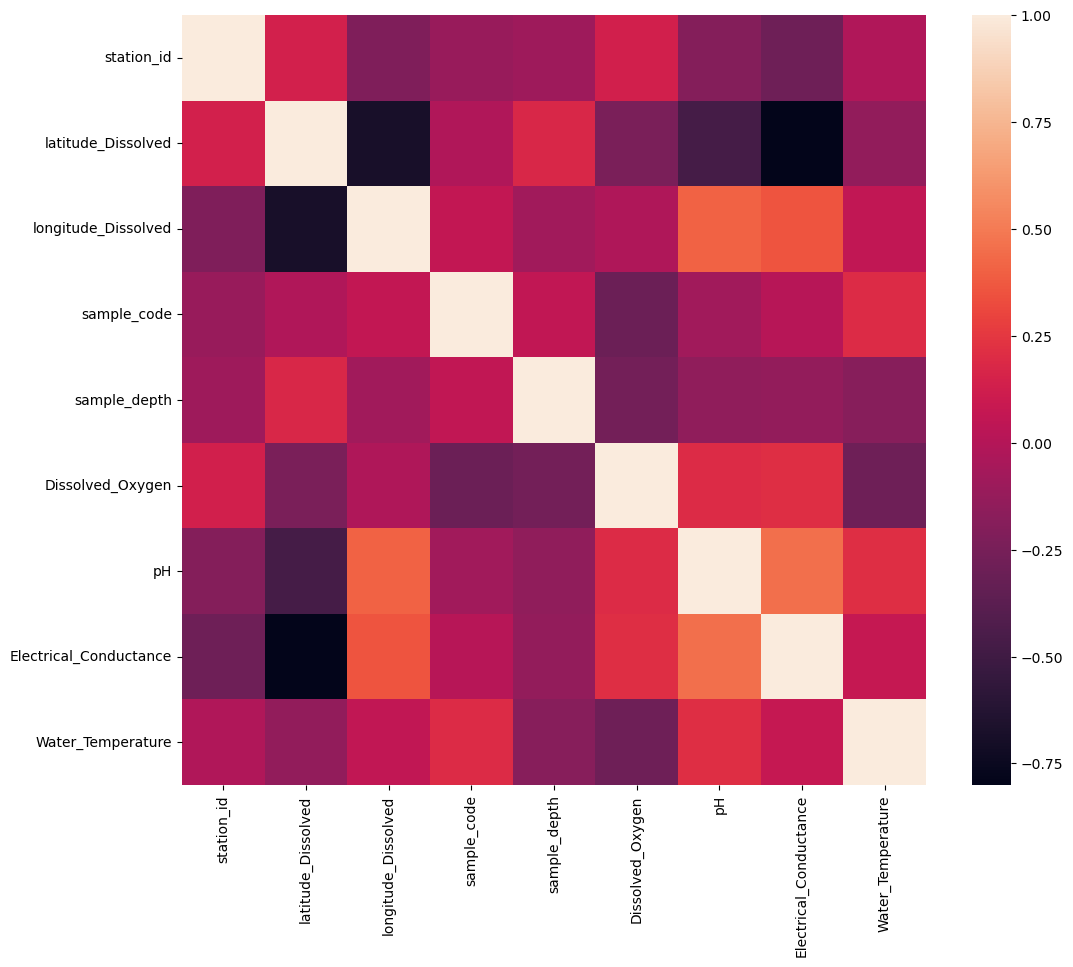

In [25]:
numeric_columns = field_results_data.select_dtypes(include=[np.number])

plt.subplots(figsize=(12,10))
sns.heatmap(numeric_columns.corr());


In [26]:
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'Dissolved_Oxygen', data=field_results_data, alpha=0.5)
        ax.set(xlabel=col, ylabel='Dissolved Oxygen in Water')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [27]:
features = [ x for x in field_results_data.columns if x not in ['county_name', 'Dissolved_Oxygen']]

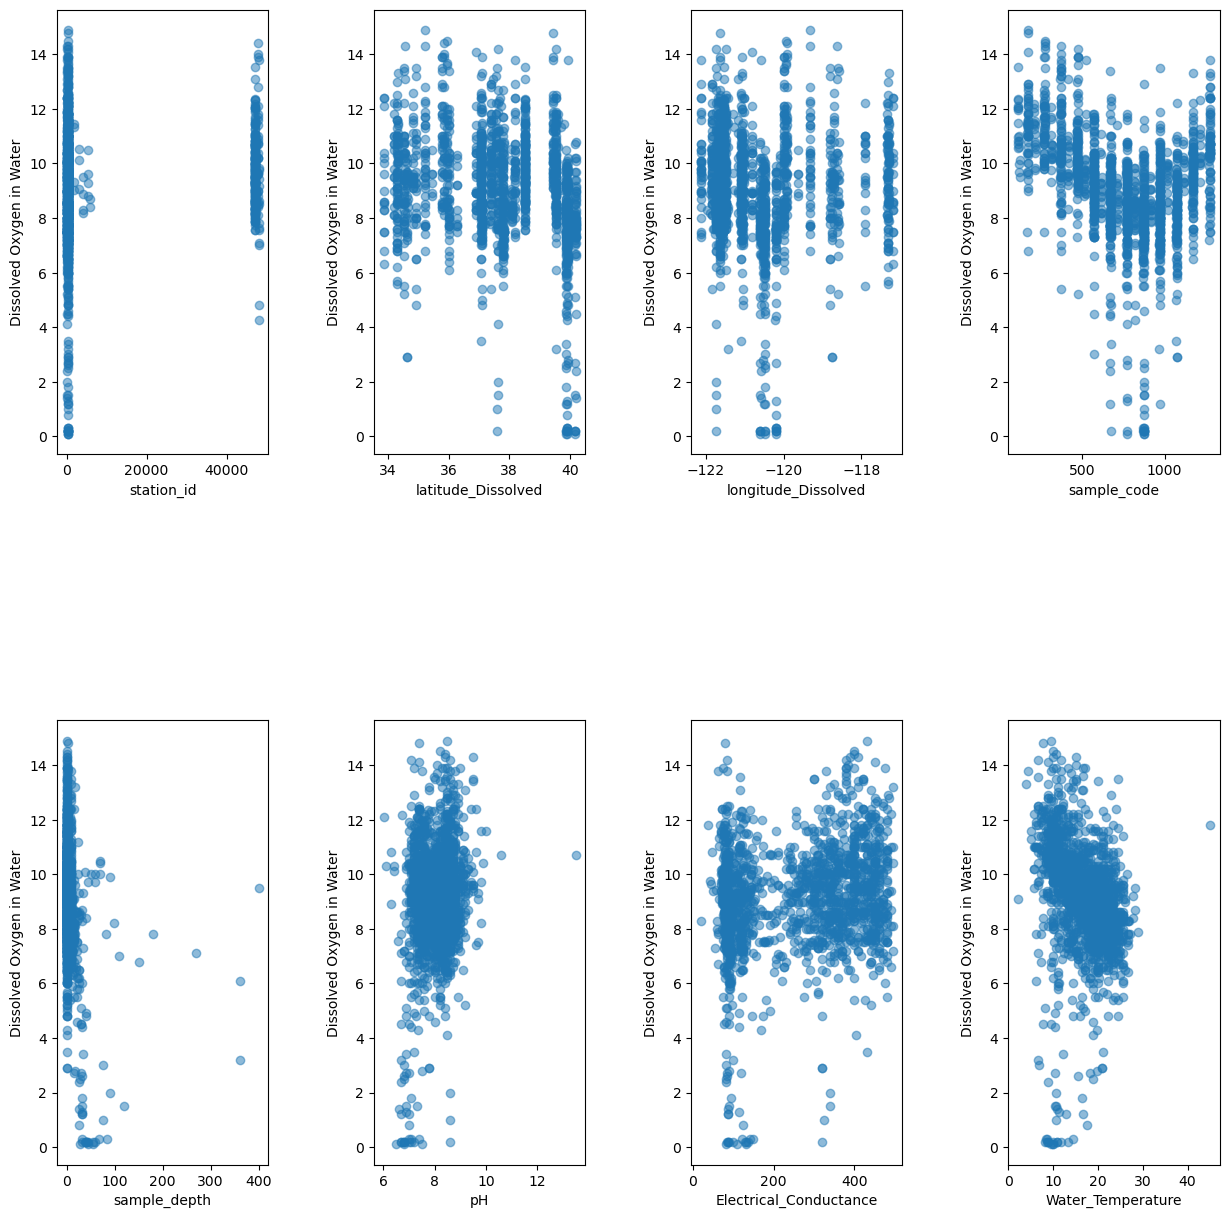

In [28]:
scatterplots(features, ncol=4, figsize=(15, 15))

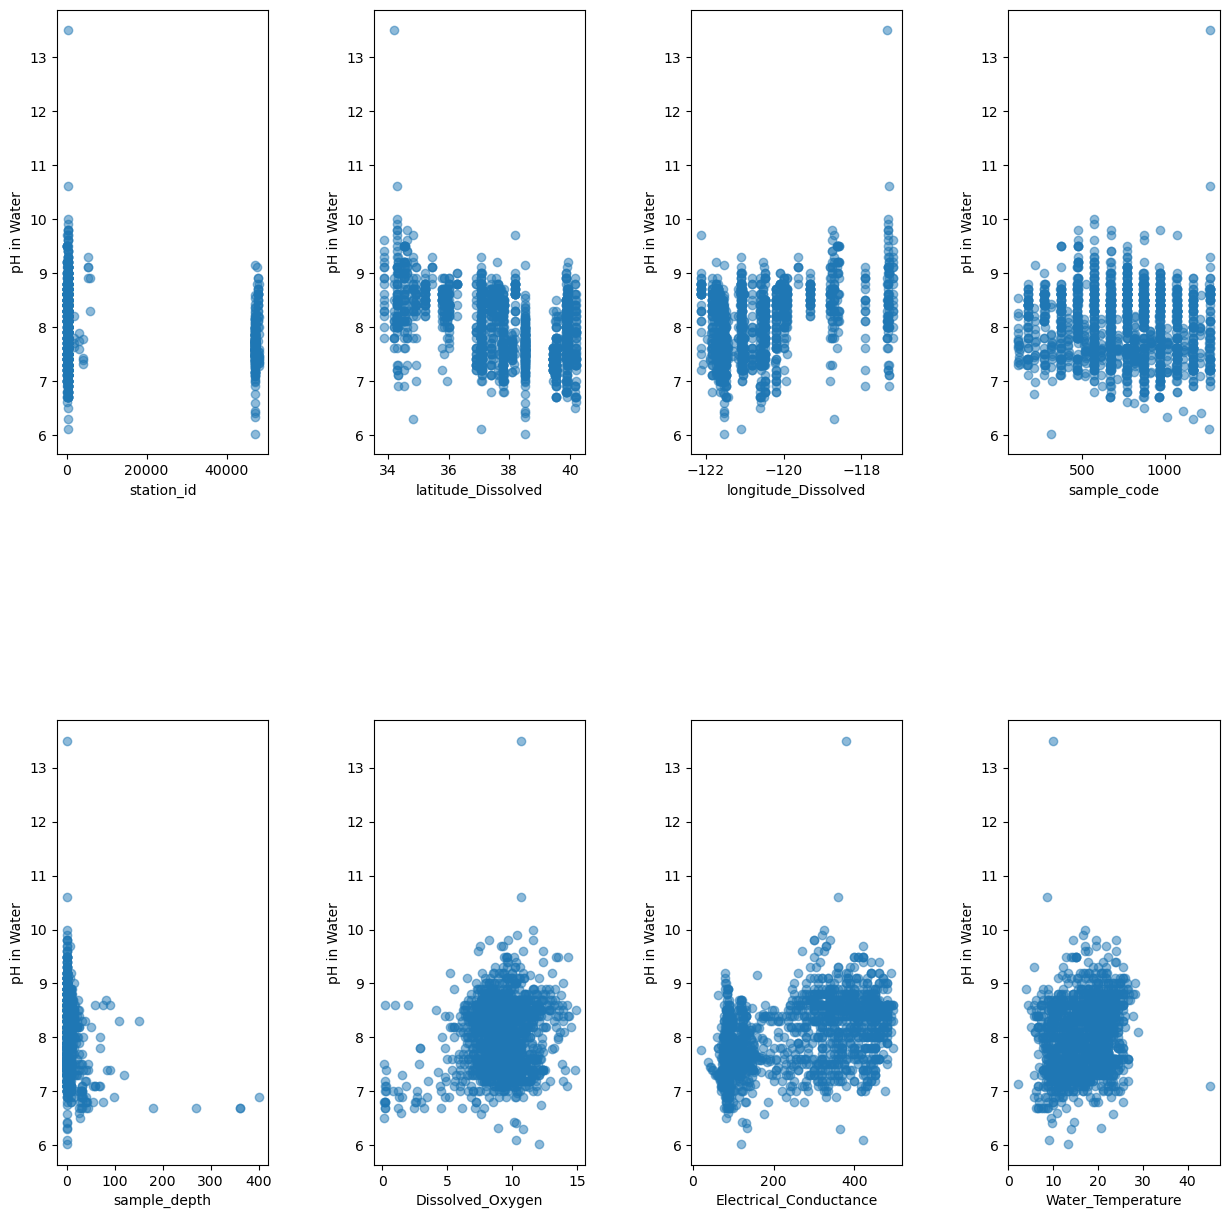

In [29]:
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'pH', data=field_results_data, alpha=0.5)
        ax.set(xlabel=col, ylabel='pH in Water')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)
        
features = [ x for x in field_results_data.columns if x not in ['county_name', 'pH']]
scatterplots(features, ncol=4, figsize=(15, 15))

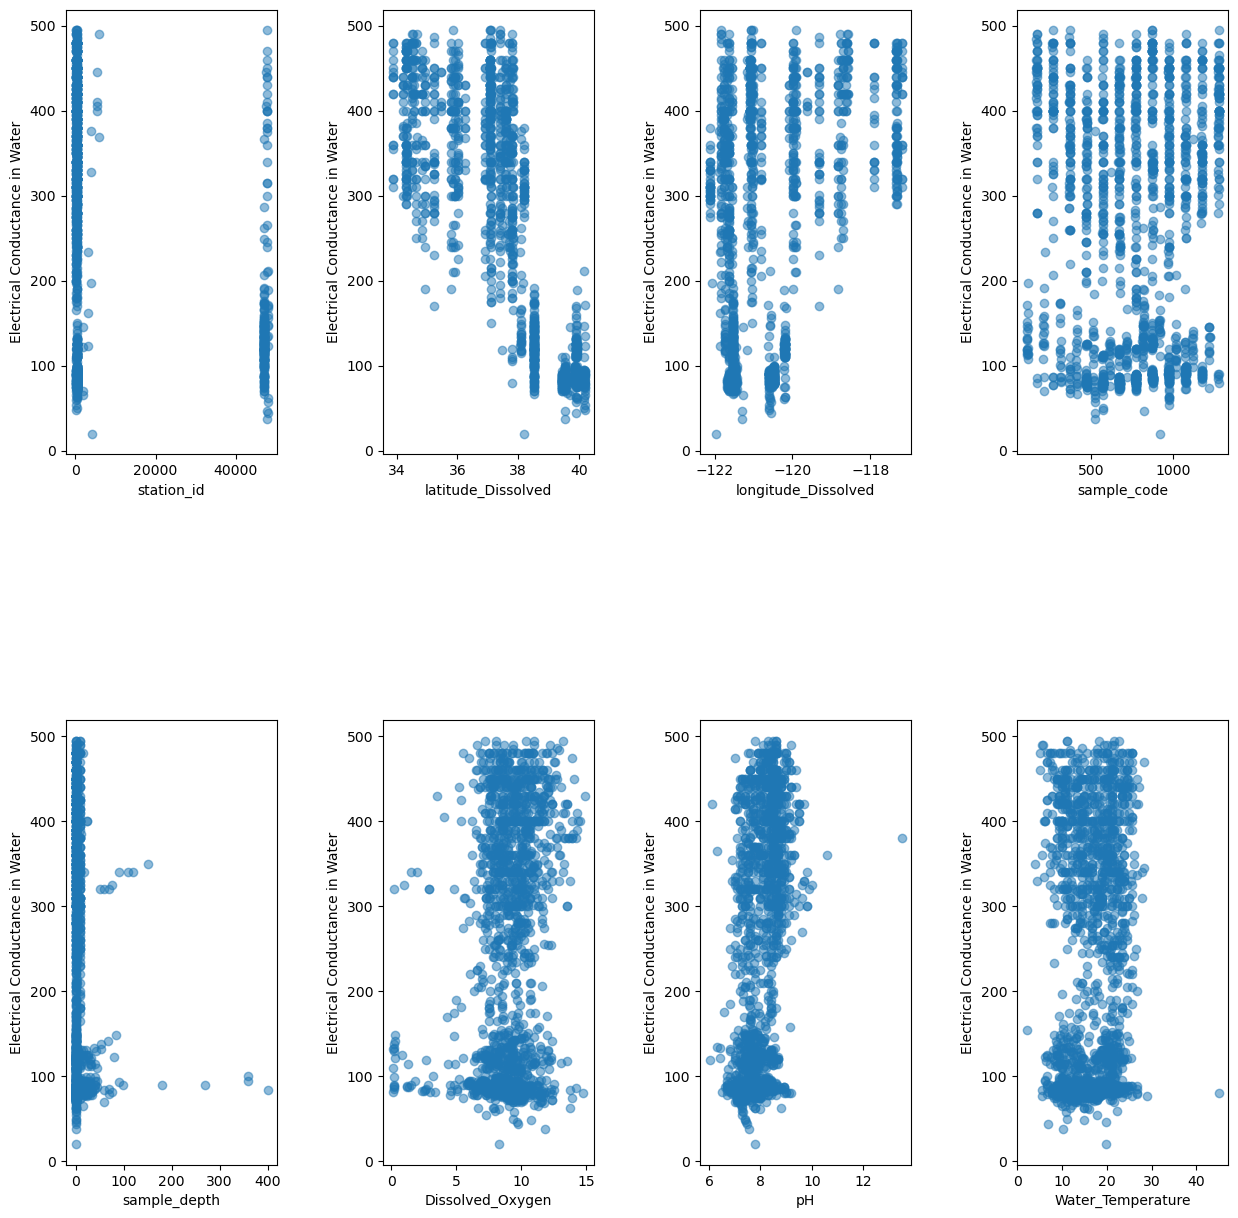

In [30]:
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'Electrical_Conductance', data=field_results_data, alpha=0.5)
        ax.set(xlabel=col, ylabel='Electrical Conductance in Water')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)
        
features = [ x for x in field_results_data.columns if x not in ['county_name', 'Electrical_Conductance']]
scatterplots(features, ncol=4, figsize=(15, 15))

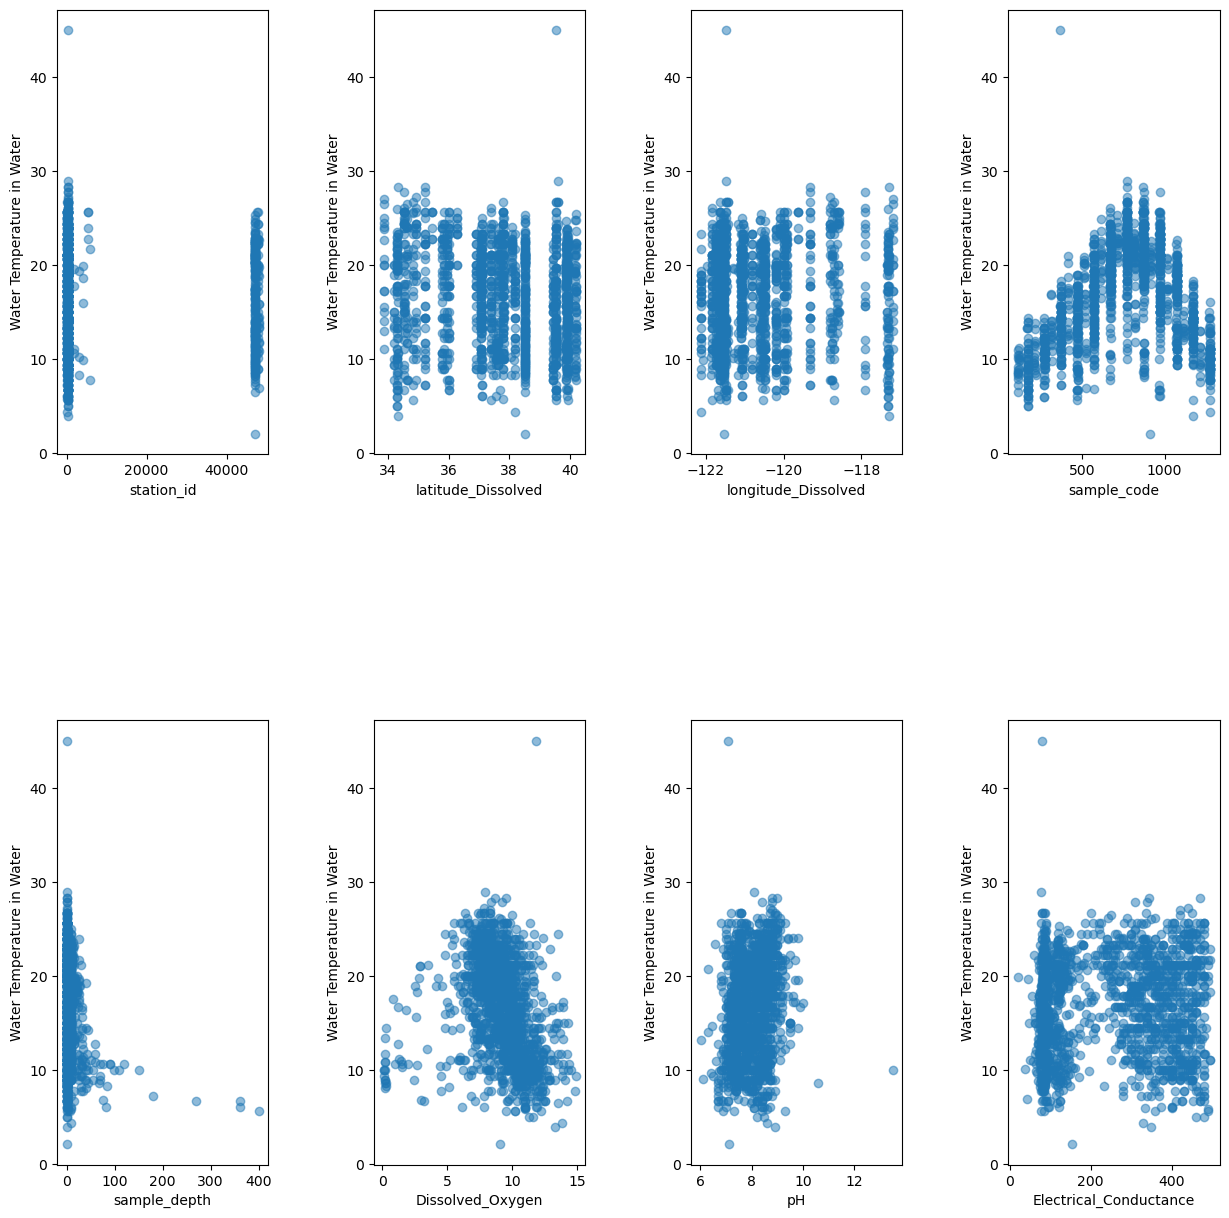

In [31]:
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'Water_Temperature', data=field_results_data, alpha=0.5)
        ax.set(xlabel=col, ylabel='Water Temperature in Water')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)
        
features = [ x for x in field_results_data.columns if x not in ['county_name', 'Water_Temperature']]
scatterplots(features, ncol=4, figsize=(15, 15))

In [32]:
field_results_data.to_csv('capstone_data_analysis_df.csv', index=False)